In [50]:
import os 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as sklm
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

C:\Users\AM7\#Work\Machine-Learning-Study-Groups


Read the dataset [ features ]

In [52]:
advworkscusts = pd.read_csv(dir_path + '\\Datasets\\Regression\\AdvWorksCusts.csv')
print(advworkscusts.shape)
advworkscusts.head()

(16519, 23)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


Read the dataset [ Labels ]

In [53]:
spend = pd.read_csv(dir_path + '\\Datasets\\Regression\\AW_AveMonthSpend.csv')
print(spend.shape)
spend.head()

(16519, 2)


,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


drop duplicates row

In [54]:
advworkscusts.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(advworkscusts.shape)
print(advworkscusts.CustomerID.unique().shape)

spend.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(spend.shape)
print(spend.CustomerID.unique().shape)

(16404, 23)
(16404,)
(16404, 2)
(16404,)


Here we merge the label column that name (AveMonthSpend) to the features dataset to be all thing in ne dataset or one table.

In [55]:
customerData = pd.merge(advworkscusts, spend)
print(customerData.shape)
customerData.head()


(16404, 24)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In this part, we convert BirthDate to age add assign it to his column.

In [56]:
from datetime import date

def calculate_age(bornyear, bornmonth, bornday):
    today = date.today()
    return today.year - bornyear - ((today.month, today.day) < (bornmonth, bornday))

In [57]:
ages = []

for i in customerData['BirthDate']:
    birthday = str(i)
    birthday = birthday.split('-')
    age = calculate_age(int(birthday[0]), int(birthday[1]), int(birthday[2]))
    ages.append(age)

customerData['Age'] = ages

Now, we have new column named age 

In [49]:
 customerData.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,NewBirthDate,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,0,0,2,137947,89,52,52
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,1,3,3,101141,117,53,53
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,1,3,3,91945,123,53,53
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,1,0,0,86688,50,50,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,4,5,5,92771,95,50,50


In [58]:
Feature_names = ['HomeOwnerFlag', 'Age', 'NumberChildrenAtHome', 'TotalChildren', 'NumberCarsOwned','YearlyIncome'] ##numerical features
Features = np.array(customerData[Feature_names])
Labels = np.array(customerData['AveMonthSpend'])
print(len(Features), len(Labels))

16404 16404


Encode the string features to numerical features

In [59]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc_cat_features = enc.fit_transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit_transform(enc_cat_features.reshape(-1,1))
    return enc_cat_features.reshape(-1,1)    

In [60]:
temp = encode_string(advworkscusts['Gender']) 
temp1 = encode_string(advworkscusts['MaritalStatus']) 

Features = np.concatenate([Features, temp,temp1], axis = 1) 

In [61]:
print(Features.shape)

(16404, 8)


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2)
print(len(x_train), len(x_test))

13123 3281


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\AM7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Build Model Without librery 

In [102]:
alpha = 0.0001
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)
theta = np.zeros(x_train.shape[1]).T

In [103]:
print(x_train.shape, y_train.shape, theta.shape)

(13123, 10) (13123,) (10,)


In [104]:
def cost_function(X, Y, theta):
    m = len(X)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

In [105]:
inital_cost = cost_function(x_train, y_train, theta)
print(inital_cost)

3014.9109959612892


In [67]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)

    m = len(X)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(theta)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss)
        # Changing Values of B using Gradient
        theta = theta - alpha / m * gradient
        # New Cost Value
        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [68]:
# n Iterations
theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, 100000)

# New Values of B
print(theta)

# Final Cost of new B
print(cost_history[-1])

[ 7.26215616e+01 -3.39571801e-02 -2.26475725e+00  1.59240728e+01
  1.35789608e+00 -1.53864319e-01  8.02357128e+00  1.41165465e+01
 -3.17168159e+00]
20.840455456319333


In [69]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [82]:
theta0 = theta[0]
thetas = theta[1:x_test.shape[1]+1]
Y_pred = x_test.dot(thetas) + theta0

rmse = lin.rmse(y_test, Y_pred)
r2 = lin.r2_score(y_test, Y_pred)
print('RMSE                    = ' + str(rmse))
print('R^2                    = ' + str(r2))

RMSE                    = 6.300626715882659
R^2                    = 0.9428816530882601


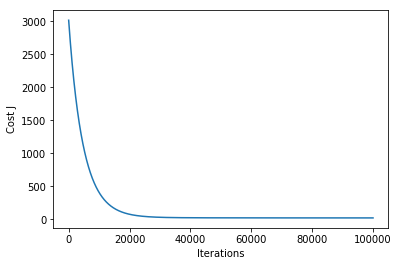

In [71]:
plt.plot(cost_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

# Build Model With librery 

In [174]:
lin_mod = linear_model.LinearRegression(n_jobs=100000)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=100000,
         normalize=False)

In [172]:
print(lin_mod.intercept_) #b value
print(lin_mod.coef_) # m values

72.28872971119405
[-0.10357517 -1.73990092 16.49299111  0.51010764 -0.22663557  7.84645909
 14.12029802 -3.17380559]


In [173]:
from sklearn.metrics import mean_squared_error
y_predicted = lin_mod.predict(x_test)
r2 = sklm.r2_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

print('RMSE                    = ' + str(rmse))
print('R^2                    = ' + str(r2))

RMSE                    = 6.405448568876771
R^2                    = 0.9466069571710485


# My Own LinearRegression Model Class

In [94]:
class LinearRegression:
    def __init__(self):
        self.alpha = 0.0001
        
    def cost_function(X, Y, theta):
        m = len(X)
        J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
        return J

    def gradient_descent(X, Y, theta, alpha, iterations):
        cost_history = np.zeros(iterations)

        m = len(X)

        for iteration in range(iterations):
            # Hypothesis Values
            h = X.dot(theta)
            # Difference b/w Hypothesis and Actual Y
            loss = h - Y
            # Gradient Calculation
            gradient = X.T.dot(loss)own
            # Changing Values of B using Gradient
            theta = theta - alpha / m * gradient
            # New Cost Value
            cost = cost_function(X, Y, theta)
            cost_history[iteration] = cost

        return theta, cost_history

    def fit(self, X, Y):
        self.ones = np.ones([X.shape[0],1])
        self.X = np.concatenate((ones,X),axis=1)
        self.theta = np.zeros(X.shape[1]).T
        self.theta, self.cost_history = gradient_descent(X, Y, theta, alpha, 100000)
        self.theta0 = self.theta[0]
        self.theta = self.theta[1:self.X.shape[1]]

    def predict(self, X):
        Y_pred = X.dot(self.theta) + self.theta0
        return Y_pred

        # Model Evaluation - RMSE
    def rmse(self, Y, Y_pred):
        rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
        return rmse

    # Model Evaluation - R2 Score
    def r2_score(self, Y, Y_pred):
        mean_y = np.mean(Y)
        ss_tot = sum((Y - mean_y) ** 2)
        ss_res = sum((Y - Y_pred) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
        

In [96]:
lin = LinearRegression()
lin.fit(x_train, y_train)

In [97]:
print(lin.theta0) #b value
print(lin.theta) # m values

72.62485697154357
[-0.03683488 -1.76740758 16.61053764  0.56619615 -0.23738994  8.00119079
 14.12323499 -3.15991518]


In [98]:
Y_pred = lin.predict(x_test)
rmse = lin.rmse(y_test, Y_pred)
r2 = lin.r2_score(y_test, Y_pred)
print('RMSE                    = ' + str(rmse))
print('R^2                    = ' + str(r2))

RMSE                    = 6.281670533184561
R^2                    = 0.9432248307064942
